# ISSUE 86:

## Criar modelo para simular isolamento parcial da população (ex idosa) - "quarentena vertical"

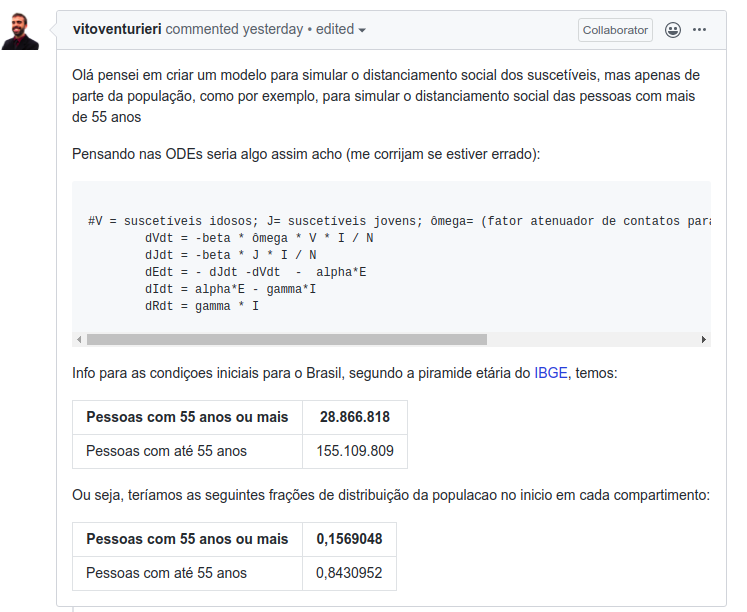

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from covid19.models import SEIRBayes

In [2]:
model = SEIRBayes(t_max=300, NEIR0=(200_000_000, 3000, 50, 0),
                  r0_dist=(2, 2.5, .95, 'lognorm'),
                  gamma_inv_dist=(10, 12, 0.95, 'lognorm'),
                  alpha_inv_dist=(4.1, 7, 0.95, 'lognorm')
                 )

In [13]:
S1, S2, E, I, R, t_space = model.sample2s(s2_fraction=0.25,
                                         omega=1,
                                         size=5000
                                        )


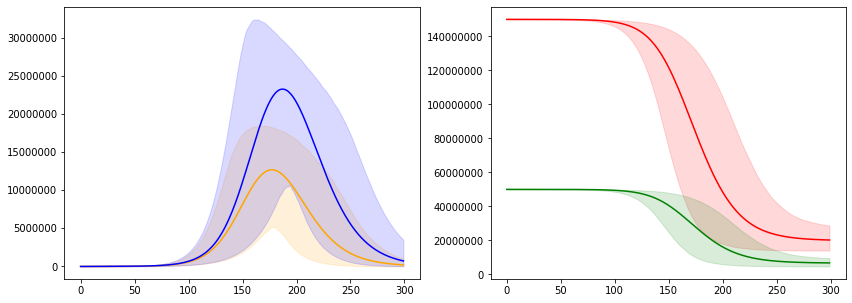

In [14]:
def summarize(x):
    return np.quantile(x, 0.025, axis=1), x.mean(axis=1), np.quantile(x, 0.975, axis=1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, j in {'orange': E, 'blue':I}.items():
    lower, average, upper = summarize(j)
    ax[0].plot(t_space, average, color=i)
    ax[0].fill_between(t_space, lower, upper, color=i, alpha=0.15)
    ax[0].ticklabel_format(style='plain')

for i, j in {'red': S1, 'green': S2}.items():
    lower, average, upper = summarize(j)
    ax[1].plot(t_space, average, color=i)
    ax[1].fill_between(t_space, lower, upper, color=i, alpha=0.15)
    ax[1].ticklabel_format(style='plain')

## SEIR normal

In [8]:
S, E, I, R, t_space = model.sample(size=5000)

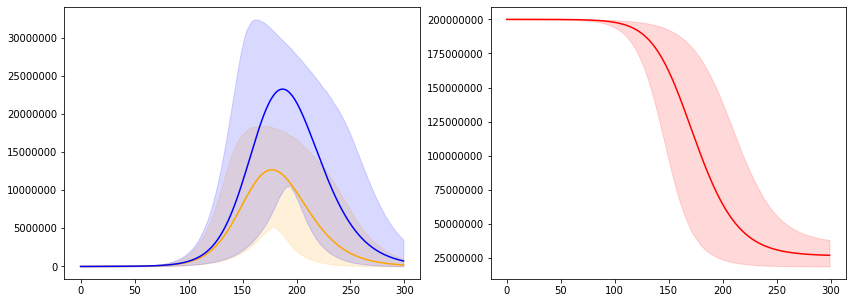

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, j in {'orange': E, 'blue':I}.items():
    lower, average, upper = summarize(j)
    ax[0].plot(t_space, average, color=i)
    ax[0].fill_between(t_space, lower, upper, color=i, alpha=0.15)
    ax[0].ticklabel_format(style='plain')

for i, j in {'red': S}.items():
    lower, average, upper = summarize(j)
    ax[1].plot(t_space, average, color=i)
    ax[1].fill_between(t_space, lower, upper, color=i, alpha=0.15)
    ax[1].ticklabel_format(style='plain')

## 2 S compartments, $\omega = 0.6$, 25% population as 'risk group'

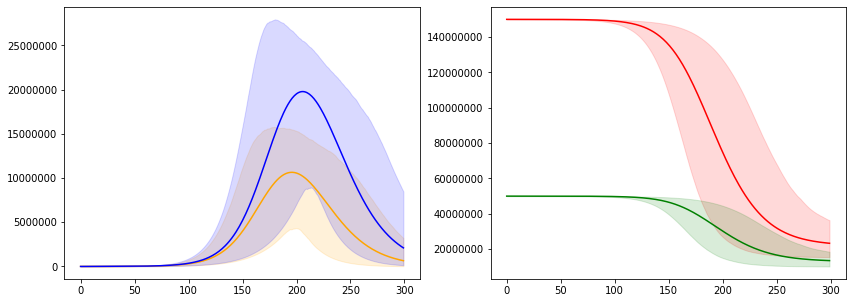

In [17]:
S1, S2, E, I, R, t_space = model.sample2s(s2_fraction=0.25,
                                         omega=0.7,
                                         size=5000
                                        )
def summarize(x):
    return np.quantile(x, 0.025, axis=1), x.mean(axis=1), np.quantile(x, 0.975, axis=1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, j in {'orange': E, 'blue':I}.items():
    lower, average, upper = summarize(j)
    ax[0].plot(t_space, average, color=i)
    ax[0].fill_between(t_space, lower, upper, color=i, alpha=0.15)
    ax[0].ticklabel_format(style='plain')

for i, j in {'red': S1, 'green': S2}.items():
    lower, average, upper = summarize(j)
    ax[1].plot(t_space, average, color=i)
    ax[1].fill_between(t_space, lower, upper, color=i, alpha=0.15)
    ax[1].ticklabel_format(style='plain')